# **Model create**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined from previous steps

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion matrix (computed but not visualized here)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Store predictions and indices for visualization in the next cell
X_full_indices = np.arange(len(X_features))
_, X_test_indices = train_test_split(X_full_indices, test_size=0.2, random_state=42)

Model Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

Non stop sign       0.92      0.92      0.92        12
    Stop sign       0.88      0.88      0.88         8

     accuracy                           0.90        20
    macro avg       0.90      0.90      0.90        20
 weighted avg       0.90      0.90      0.90        20


Confusion Matrix:
[[11  1]
 [ 1  7]]


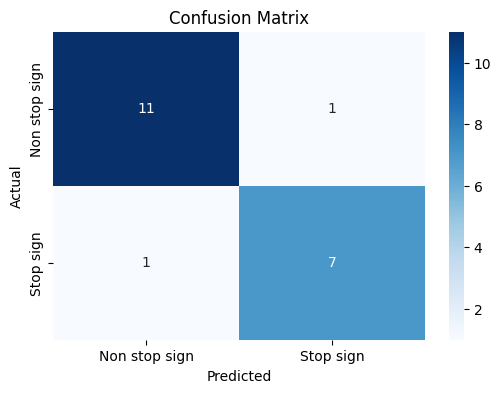

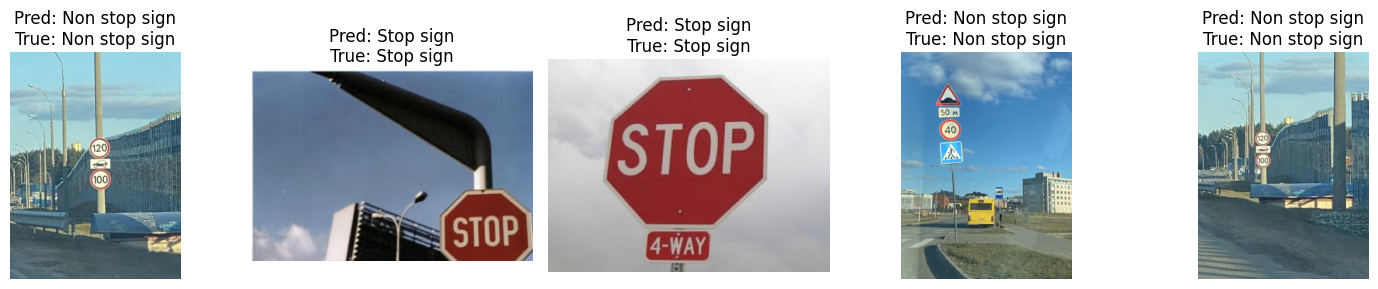

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model, y_pred, y_test, cm, X_test_indices, original_images, categories are defined from Cell 1

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize 5 random test predictions
num_samples = 5
test_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(test_indices):
    orig_idx = X_test_indices[idx]
    plt.subplot(1, num_samples, i + 1)
    original_rgb = cv2.cvtColor(original_images[orig_idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    pred_label = categories[y_pred[idx]]
    true_label = categories[y_test[idx]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    if pred_label != true_label:
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Evaluate on Unseen data**

In [ ]:
from skimage.feature import hog
import cv2
import numpy as np

# Assuming model, IMG_SIZE, and categories are defined from previous steps

def predict_stop_sign(image_path):
    # Step 1: Load and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image at {image_path}")
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_normalized = img_gray / 255.0

    # Step 2: Extract HOG features
    img_features = hog(img_normalized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

    # Step 3: Predict using the trained model
    prediction = model.predict([img_features])[0]
    return categories[prediction], img, img_normalized, img_features

# Test with a new image
test_image = "/content/drive/MyDrive/project_445/Test images/Non stop sign/road108.png"  # Replace with your image path
result, test_img_original, test_img_processed, test_img_features = predict_stop_sign(test_image)
print("Prediction:", result)

Prediction: Non stop sign


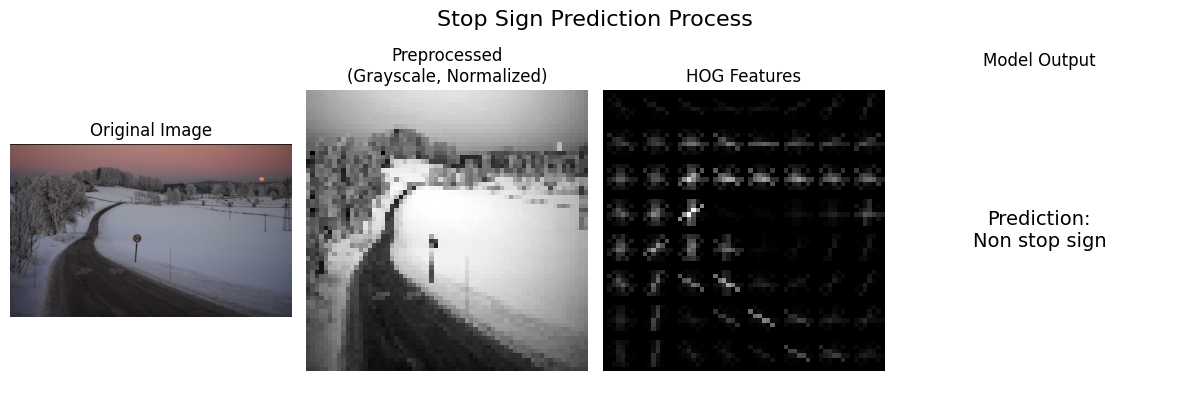

In [ ]:
import matplotlib.pyplot as plt

# Assuming test_img_original, test_img_processed, result, and model are defined from Cell 1

plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 4, 1)
original_rgb = cv2.cvtColor(test_img_original, cv2.COLOR_BGR2RGB)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis('off')

# Preprocessed image (grayscale, normalized)
plt.subplot(1, 4, 2)
plt.imshow(test_img_processed, cmap='gray')
plt.title("Preprocessed\n(Grayscale, Normalized)")
plt.axis('off')

# HOG visualization
plt.subplot(1, 4, 3)
_, hog_image = hog(test_img_processed, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.axis('off')

# Prediction result
plt.subplot(1, 4, 4)
plt.text(0.5, 0.5, f"Prediction:\n{result}",
         fontsize=14, ha='center', va='center')
plt.title("Model Output")
plt.axis('off')

plt.suptitle("Stop Sign Prediction Process", fontsize=16)
plt.tight_layout()
plt.show()